In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
books=pd.read_csv("Books.csv", low_memory=False)
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

# Dataset Review

## Book dataset

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Book-Author , Publisher, Image-URL-L has null values but as each ISBN is unique so can not drop na. Hence filling null values with "Unknown" for respective columns

In [5]:
len(books["ISBN"].unique())

271360

In [6]:
books.fillna(value="Unknown",inplace=True)

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
books[books["Image-URL-S"]=="http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
21723,185326119X,The Jungle Book (Wordsworth Collection),Rudyard Kipling,1998,NTC/Contemporary Publishing Company,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...
116461,185326119x,The Jungle Book (Wordsworth Collection),Rudyard Kipling,1998,NTC/Contemporary Publishing Company,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...


In [9]:

books[books["Image-URL-S"]=="http://images.amazon.com/images/P/006099486X.01.THUMBZZZ.jpg"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
3591,006099486X,The Professor and the Madman: A Tale of Murder...,Simon Winchester,1999,Perennial,http://images.amazon.com/images/P/006099486X.0...,http://images.amazon.com/images/P/006099486X.0...,http://images.amazon.com/images/P/006099486X.0...
168738,006099486x,The Professor and the Madman: A Tale of Murder...,Simon Winchester,1999,Perennial,http://images.amazon.com/images/P/006099486X.0...,http://images.amazon.com/images/P/006099486X.0...,http://images.amazon.com/images/P/006099486X.0...


In [10]:
books['Image-URL-S'].value_counts()

http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg    2
http://images.amazon.com/images/P/006099486X.01.THUMBZZZ.jpg    2
http://images.amazon.com/images/P/044991089X.01.THUMBZZZ.jpg    2
http://images.amazon.com/images/P/086611873X.01.THUMBZZZ.jpg    2
http://images.amazon.com/images/P/039552105X.01.THUMBZZZ.jpg    2
                                                               ..
http://images.amazon.com/images/P/1860461050.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0553213067.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/156971634X.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/349223674X.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.THUMBZZZ.jpg    1
Name: Image-URL-S, Length: 271044, dtype: int64

In [11]:
books['Image-URL-L'].value_counts()

Unknown                                                         3
http://images.amazon.com/images/P/226401654X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/140003065X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/014062063X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/039552105X.01.LZZZZZZZ.jpg    2
                                                               ..
http://images.amazon.com/images/P/1860461050.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0553213067.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/156971634X.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/349223674X.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.LZZZZZZZ.jpg    1
Name: Image-URL-L, Length: 271042, dtype: int64

It is found that few ISBN has duplicate values wherein difference is only in last character one is in small and other is in caps to remove duplicate Uppercasing all ISBN

In [12]:
upper_isbn= lambda x: x.upper()

In [13]:
trim_isbn=lambda x: x.strip()

In [14]:
books['ISBN']=books['ISBN'].astype('str')

In [15]:
# Trimming ISBN values
books["ISBN"]=books.ISBN.apply(trim_isbn)

In [16]:
#uppercasing ISBN values
books["ISBN"]=books.ISBN.apply(upper_isbn)

In [17]:
books.value_counts()

ISBN        Book-Title                                                                   Book-Author           Year-Of-Publication  Publisher                Image-URL-S                                                   Image-URL-M                                                   Image-URL-L                                                 
039543095X  Cultural Literacy: What Every American Needs to Know                         E. D. Hirsch Jr.      1987                 Houghton Mifflin         http://images.amazon.com/images/P/039543095X.01.THUMBZZZ.jpg  http://images.amazon.com/images/P/039543095X.01.MZZZZZZZ.jpg  http://images.amazon.com/images/P/039543095X.01.LZZZZZZZ.jpg    2
044056428X  Nice Guys Sleep Alone: Dating in the Difficult Eighties                      Bruce Feirstein       1986                 Dell Publishing Company  http://images.amazon.com/images/P/044056428X.01.THUMBZZZ.jpg  http://images.amazon.com/images/P/044056428X.01.MZZZZZZZ.jpg  http://images.amazon.com/image

In [18]:
## Removing duplicate entries
books.drop_duplicates(inplace=True)

In [19]:
books.value_counts()

ISBN        Book-Title                                                      Book-Author                    Year-Of-Publication  Publisher             Image-URL-S                                                   Image-URL-M                                                   Image-URL-L                                                 
0000913154  The Way Things Work: An Illustrated Encyclopedia of Technology  C. van Amerongen (translator)  1967                 Simon &amp; Schuster  http://images.amazon.com/images/P/0000913154.01.THUMBZZZ.jpg  http://images.amazon.com/images/P/0000913154.01.MZZZZZZZ.jpg  http://images.amazon.com/images/P/0000913154.01.LZZZZZZZ.jpg    1
0812517008  Ripper                                                          Gardner Dozois                 1988                 Tor Books             http://images.amazon.com/images/P/0812517008.01.THUMBZZZ.jpg  http://images.amazon.com/images/P/0812517008.01.MZZZZZZZ.jpg  http://images.amazon.com/images/P/0812517008.01.LZZ

In [20]:
books['Image-URL-S'].value_counts()

http://images.amazon.com/images/P/051513628X.01.THUMBZZZ.jpg    2
http://images.amazon.com/images/P/0385722206.01.THUMBZZZ.jpg    2
http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/1588454959.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0882732862.01.THUMBZZZ.jpg    1
                                                               ..
http://images.amazon.com/images/P/0871236583.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0440225914.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/8423309835.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/342378170X.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.THUMBZZZ.jpg    1
Name: Image-URL-S, Length: 271044, dtype: int64

In [21]:
books[books['ISBN']=='051513628X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
16202,051513628X,Key of Light (Key Trilogy (Paperback)),Nora Roberts,2003,Jove Books,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...
213834,051513628X,Key of Light,Nora Roberts,2003,Jove Books,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...


In [22]:
# Few ISBN still repeating as Book title is slightly different hence dropping duplicate values
books.drop(labels=16202, inplace=True)

In [23]:
books[books['ISBN']=='051513628X']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
213834,051513628X,Key of Light,Nora Roberts,2003,Jove Books,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...


In [24]:
books['Image-URL-S'].value_counts()

http://images.amazon.com/images/P/0385722206.01.THUMBZZZ.jpg    2
http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0439446171.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0439334039.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0345404939.01.THUMBZZZ.jpg    1
                                                               ..
http://images.amazon.com/images/P/0871236583.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0440225914.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/8423309835.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/342378170X.01.THUMBZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.THUMBZZZ.jpg    1
Name: Image-URL-S, Length: 271044, dtype: int64

In [25]:
books['Image-URL-M'].value_counts()

http://images.amazon.com/images/P/0385722206.01.MZZZZZZZ.jpg    2
http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0439446171.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0439334039.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0345404939.01.MZZZZZZZ.jpg    1
                                                               ..
http://images.amazon.com/images/P/0871236583.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0440225914.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/8423309835.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/342378170X.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.MZZZZZZZ.jpg    1
Name: Image-URL-M, Length: 271044, dtype: int64

In [26]:
books[books['ISBN']=='03857222060']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [27]:
books[books['ISBN']=='0385722206']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
5248,0385722206,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,2002,Anchor,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...


In [28]:
books['Image-URL-M'].value_counts()

http://images.amazon.com/images/P/0385722206.01.MZZZZZZZ.jpg    2
http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0439446171.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0439334039.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0345404939.01.MZZZZZZZ.jpg    1
                                                               ..
http://images.amazon.com/images/P/0871236583.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0440225914.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/8423309835.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/342378170X.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.MZZZZZZZ.jpg    1
Name: Image-URL-M, Length: 271044, dtype: int64

In [29]:
books[books['Image-URL-M']=='http://images.amazon.com/images/P/0385722206.01.MZZZZZZZ.jpg']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
5248,0385722206,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,2002,Anchor,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...
251649,0385722206 0,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,2002,Anchor,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...


In [30]:
# Few ISBN still repeating as Book title is slightly different hence dropping duplicate values as shown above found ISBN 0385722206 is Valid ISBN hence dropping 03857222060
books.drop(labels=251649, inplace=True)

In [31]:
books[books['Image-URL-M']=='http://images.amazon.com/images/P/0385722206.01.MZZZZZZZ.jpg']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
5248,0385722206,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,2002,Anchor,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...


In [32]:
books['Image-URL-M'].value_counts()

http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0609800329.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0811202089.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0802133290.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0439334039.01.MZZZZZZZ.jpg    1
                                                               ..
http://images.amazon.com/images/P/158648009X.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0871236583.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0440225914.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/8423309835.01.MZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.MZZZZZZZ.jpg    1
Name: Image-URL-M, Length: 271044, dtype: int64

In [33]:
books.shape

(271044, 8)

## Ratings dataset

In [34]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [35]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [36]:
ratings["ISBN"]=ratings['ISBN'].apply(upper_isbn)
ratings['ISBN']=ratings['ISBN'].apply(trim_isbn)

In [37]:
ratings[ratings["User-ID"]==2]

,User-ID,ISBN,Book-Rating
9561,2,0195153448,0


In [38]:
ratings["User-ID"].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [39]:
ratings["ISBN"]=ratings["ISBN"].astype('str')
ratings[['ISBN','Book-Rating']].groupby('ISBN').mean('Book-Rating')

,Book-Rating
ISBN,
#069580216X,0.0
#6612432,5.0
'9607092856',0.0
'9607092910',10.0
(THEWINDMILLP,0.0
...,...
"\9170010242\""""",10.0
`3502103682,0.0
§423350229,0.0


In [40]:
len(ratings["ISBN"].unique())

340215

In [41]:
ratings[ratings['ISBN'].isin(books['ISBN'].unique())]

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [42]:
ratings[ratings['ISBN']=='000000000000']

,User-ID,ISBN,Book-Rating
215370,50321,000000000000,0
450174,107899,000000000000,0
498886,120548,000000000000,0
571368,137348,000000000000,7
858695,207650,000000000000,0


In [43]:
new=ratings[ratings['ISBN'].isin(books['ISBN'].unique())]
len(new["ISBN"].unique())

269842

In [44]:
import re

In [45]:
def remove_special_characters_and_extra_spaces(text):
    # Define a regular expression pattern to match symbols/special characters and extra white spaces
    pattern = r'[^a-zA-Z0-9\s]+|(?<=\s)\s+|\s+(?=\s )'

    # Use re.sub() to replace all matches with a single space
    cleaned_text = re.sub(pattern, '', text)

    # Remove leading and trailing spaces
    cleaned_text = cleaned_text.strip()
    pattern = r'\s+'
    cleaned_text = re.sub(pattern, '', cleaned_text)

    return cleaned_text

In [46]:
def count_values(data, column, new_column):
    value_counts = data[column].value_counts()
    value_counts=value_counts.reset_index(name=new_column).rename(columns={'index':column})
    return value_counts

In [47]:
ratings.shape

(1149780, 3)

In [48]:
ratings['ISBN']=ratings['ISBN'].apply(remove_special_characters_and_extra_spaces)
ratings['ISBN']=ratings['ISBN'].apply(remove_special_characters_and_extra_spaces)
len(count_values(ratings,"ISBN","ISBN_counts")["ISBN"].apply(remove_special_characters_and_extra_spaces).unique())

339899

In [49]:
ratings["ISBN"]=ratings["ISBN"].astype('str')
ratings[['ISBN','Book-Rating']].groupby('ISBN').mean('Book-Rating')

,Book-Rating
ISBN,
00000000,2.666667
000000000,0.500000
0000000000,4.222222
00000000000,1.600000
000000000000,1.400000
...,...
Y99697115,8.000000
YOUTELLEMAND,0.000000
Z380703475,8.000000


In [50]:
ratings[ratings['ISBN'].isin(books['ISBN'].unique())]

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [51]:
value_counts = ratings["User-ID"].value_counts()
value_counts=value_counts.reset_index(name="Ratings_counts").rename(columns={'index':'User-ID'})
#value_counts.rename(columns={'index':'User-ID'})
value_counts

,User-ID,Ratings_counts
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
...,...,...
105278,116180,1
105279,116166,1
105280,116154,1
105281,116137,1


In [52]:
ratings[ratings['ISBN']=='000000000000']
# As found ratings ISBN column has some incorrect ISBN number hence filtering dataset only with Correct ISBN values obtained from books dataset

,User-ID,ISBN,Book-Rating
215370,50321,000000000000,0
450174,107899,000000000000,0
498886,120548,000000000000,0
571368,137348,000000000000,7
858695,207650,000000000000,0


In [53]:
ratings_new=ratings[ratings['ISBN'].isin(books['ISBN'].unique())]

In [54]:
ratings_new=ratings_new.merge(value_counts, on='User-ID')

In [55]:
#ratings_new[ratings_new["User-ID"]]
ratings_new.shape

(1031472, 4)

In [56]:
ratings_new[ratings_new["Ratings_counts"]>=200]

,User-ID,ISBN,Book-Rating,Ratings_counts
1151,277427,002542730X,10,497
1152,277427,0026217457,0,497
1153,277427,003008685X,8,497
1154,277427,0030615321,0,497
1155,277427,0060002050,0,497
...,...,...,...,...
1029692,275970,1931868123,0,1376
1029693,275970,3411086211,10,1376
1029694,275970,3829021860,0,1376
1029695,275970,4770019572,0,1376


In [57]:
ratings_new[ratings_new['User-ID']==11676].head()

,User-ID,ISBN,Book-Rating,Ratings_counts
39826,11676,0001837397,0,13602
39827,11676,0001841572,0,13602
39828,11676,0001848445,0,13602
39829,11676,0001900277,0,13602
39830,11676,0001941941,0,13602


In [58]:
ratings_new['ISBN']=ratings_new['ISBN'].apply(remove_special_characters_and_extra_spaces)

In [59]:
len(count_values(ratings_new,"ISBN","ISBN_counts")["ISBN"].apply(remove_special_characters_and_extra_spaces).unique())

269842

In [60]:
ratings_new['ISBN']=ratings_new['ISBN'].apply(remove_special_characters_and_extra_spaces)

In [61]:
ratings_new[ratings_new['User-ID']==11676]

,User-ID,ISBN,Book-Rating,Ratings_counts
39826,11676,0001837397,0,13602
39827,11676,0001841572,0,13602
39828,11676,0001848445,0,13602
39829,11676,0001900277,0,13602
39830,11676,0001941941,0,13602
...,...,...,...,...
50974,11676,9879397274,7,13602
50975,11676,987960170X,5,13602
50976,11676,9974643058,7,13602
50977,11676,9997511417,0,13602


## User dataset

In [62]:
users=pd.read_csv('Users.csv')
users["Location"]=users.Location.apply(upper_isbn)

In [63]:
users.head(2)

,User-ID,Location,Age
0,1,"NYC, NEW YORK, USA",NaN
1,2,"STOCKTON, CALIFORNIA, USA",18.0


In [64]:
def clean_data(text):
    # Define a regular expression pattern to match anything that is not a letter or digit
    pattern = r'[^a-zA-Z0-9\s]+'

    # Use re.sub() to replace all matches with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [65]:
location_split=lambda x: x.split(",")
location= lambda x: x[-3:]

In [66]:
user_location=pd.DataFrame(users["Location"].apply(location_split).apply(location).tolist())
user_location.head(2)

,0,1,2
0,NYC,NEW YORK,USA
1,STOCKTON,CALIFORNIA,USA


In [67]:
len(user_location[2].unique())

708

In [68]:
user_location.rename(columns={0:"City",1:"State",2:"Country"}, inplace=True)
user_location.head(2)

,City,State,Country
0,NYC,NEW YORK,USA
1,STOCKTON,CALIFORNIA,USA


In [69]:
user_location['City']=user_location['City'].apply(clean_data)
#user_location['State']=user_location['State'].apply(clean_data)
#user_location['Country']=user_location['Country'].apply(clean_data)

In [70]:
user_location["State"]=user_location["State"].astype("str")
user_location['State']=user_location['State'].apply(clean_data)

In [71]:
user_location["Country"]=user_location["Country"].astype("str")
user_location['Country']=user_location['Country'].apply(clean_data)

In [72]:
users.drop('Location', axis=1, inplace=True)
users[user_location.columns]=user_location
users.head(2)

,User-ID,Age,City,State,Country
0,1,NaN,NYC,NEW YORK,USA
1,2,18.0,STOCKTON,CALIFORNIA,USA


In [73]:
len(users.Country.unique())

606

In [74]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      168096 non-null  float64
 2   City     278858 non-null  object 
 3   State    278858 non-null  object 
 4   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


In [75]:
users[["Age","City","State","Country"]]=users[["Age","City","State","Country"]].fillna("NOT PROVIDED")

In [76]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  object
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.6+ MB


In [77]:
users

,User-ID,Age,City,State,Country
0,1,NOT PROVIDED,NYC,NEW YORK,USA
1,2,18.0,STOCKTON,CALIFORNIA,USA
2,3,NOT PROVIDED,MOSCOW,YUKON TERRITORY,RUSSIA
3,4,17.0,PORTO,VNGAIA,PORTUGAL
4,5,NOT PROVIDED,FARNBOROUGH,HANTS,UNITED KINGDOM
...,...,...,...,...,...
278853,278854,NOT PROVIDED,PORTLAND,OREGON,USA
278854,278855,50.0,TACOMA,WASHINGTON,UNITED KINGDOM
278855,278856,NOT PROVIDED,BRAMPTON,ONTARIO,CANADA
278856,278857,NOT PROVIDED,KNOXVILLE,TENNESSEE,USA


#  Creating new data set using All 3 files data 

In [78]:
ratings_new.head(2)

,User-ID,ISBN,Book-Rating,Ratings_counts
0,276725,034545104X,0,1
1,276726,0155061224,5,1


In [79]:
users.head(2)

,User-ID,Age,City,State,Country
0,1,NOT PROVIDED,NYC,NEW YORK,USA
1,2,18.0,STOCKTON,CALIFORNIA,USA


In [80]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [81]:
""" ratings columns has max values also as we have multiple responses from each users on different books hence mergin significant columns from other dataset 
 to this for further processing.
 Significant columns from book dataset are "Book-Author", "Year-Of-Publication", "Publisher"  Note: Not utlizing book title because we already have ISBN
 and URL columns can be utilized during deployment as it only contains book images
 from User dataset utlizing user country city state and Age and location columns is transform into 3 seprate columns for better understanding."""
final=ratings_new.merge(books[['ISBN','Book-Author','Year-Of-Publication','Publisher']], on='ISBN')

In [82]:
final=final.merge(users, on='User-ID')

In [83]:

final["Book-Author"]=final["Book-Author"].apply(clean_data)
final["Publisher"]=final["Publisher"].apply(clean_data)

In [84]:
final["Country"]=final['Country'].apply(trim_isbn)

In [85]:
final

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
0,276725,034545104X,0,1,M J Rose,2002,Ballantine Books,NOT PROVIDED,TYLER,TEXAS,USA
1,2313,034545104X,5,37,M J Rose,2002,Ballantine Books,23.0,CINCINNATI,OHIO,USA
2,2313,0812533550,9,37,Orson Scott Card,1986,Tor Books,23.0,CINCINNATI,OHIO,USA
3,2313,0679745580,8,37,TRUMAN CAPOTE,1994,Vintage,23.0,CINCINNATI,OHIO,USA
4,2313,0060173289,9,37,Rebecca Wells,1996,HarperCollins,23.0,CINCINNATI,OHIO,USA
...,...,...,...,...,...,...,...,...,...,...,...
1031467,276442,2862749796,7,4,Katherine Neville,2002,Le Cherche Midi,62.0,GENVE,GENVE,SWITZERLAND
1031468,276618,3788097000,5,1,Ludwig Marum,1984,CF Mller,NOT PROVIDED,STUTTGART,NA,GERMANY
1031469,276647,0553571001,0,2,L M Montgomery,2001,Starfire,13.0,ARLINGTON HEIGHTS,ILLINOIS,USA
1031470,276647,0689822294,10,2,Angela Johnson,1998,Simon amp Schuster Childrens Publishing,13.0,ARLINGTON HEIGHTS,ILLINOIS,USA


In [86]:
len(final["Publisher"].unique())

16445

In [87]:
len(final[final["Country"]=='USA']["Publisher"].unique())

11475

In [88]:
final['Country'].value_counts().index[final['Country'].value_counts()>1000]

Index(['USA', 'CANADA', 'UNITED KINGDOM', 'GERMANY', '', 'AUSTRALIA', 'SPAIN',
       'NA', 'FRANCE', 'PORTUGAL', 'NEW ZEALAND', 'MALAYSIA', 'NETHERLANDS',
       'SWITZERLAND', 'ITALY', 'AUSTRIA', 'IRAN', 'FINLAND', 'ROMANIA',
       'SINGAPORE'],
      dtype='object')

In [89]:
final[final["Country"].isin(final['Country'].value_counts().index[final['Country'].value_counts()>1000])]

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
0,276725,034545104X,0,1,M J Rose,2002,Ballantine Books,NOT PROVIDED,TYLER,TEXAS,USA
1,2313,034545104X,5,37,M J Rose,2002,Ballantine Books,23.0,CINCINNATI,OHIO,USA
2,2313,0812533550,9,37,Orson Scott Card,1986,Tor Books,23.0,CINCINNATI,OHIO,USA
3,2313,0679745580,8,37,TRUMAN CAPOTE,1994,Vintage,23.0,CINCINNATI,OHIO,USA
4,2313,0060173289,9,37,Rebecca Wells,1996,HarperCollins,23.0,CINCINNATI,OHIO,USA
...,...,...,...,...,...,...,...,...,...,...,...
1031467,276442,2862749796,7,4,Katherine Neville,2002,Le Cherche Midi,62.0,GENVE,GENVE,SWITZERLAND
1031468,276618,3788097000,5,1,Ludwig Marum,1984,CF Mller,NOT PROVIDED,STUTTGART,NA,GERMANY
1031469,276647,0553571001,0,2,L M Montgomery,2001,Starfire,13.0,ARLINGTON HEIGHTS,ILLINOIS,USA
1031470,276647,0689822294,10,2,Angela Johnson,1998,Simon amp Schuster Childrens Publishing,13.0,ARLINGTON HEIGHTS,ILLINOIS,USA


In [90]:
final[final['Ratings_counts']>=10].shape

(877292, 11)

In [91]:
final[final['Ratings_counts']<=10].shape

(163351, 11)

In [92]:
# filtered data set with users only who have rated 10 ore more books
final_new=final[final['Ratings_counts']>=10]
final_new.shape

(877292, 11)

In [93]:
final[final["Country"]=='USA']

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
0,276725,034545104X,0,1,M J Rose,2002,Ballantine Books,NOT PROVIDED,TYLER,TEXAS,USA
1,2313,034545104X,5,37,M J Rose,2002,Ballantine Books,23.0,CINCINNATI,OHIO,USA
2,2313,0812533550,9,37,Orson Scott Card,1986,Tor Books,23.0,CINCINNATI,OHIO,USA
3,2313,0679745580,8,37,TRUMAN CAPOTE,1994,Vintage,23.0,CINCINNATI,OHIO,USA
4,2313,0060173289,9,37,Rebecca Wells,1996,HarperCollins,23.0,CINCINNATI,OHIO,USA
...,...,...,...,...,...,...,...,...,...,...,...
1031459,276067,0694004162,10,1,Laura Joffe Numeroff,1992,HarperCollins Publishers,36.0,RESTON,VIRGINIA,USA
1031463,276262,0741411504,0,1,Richard Saunier,2002,Infinity Publishing PA,68.0,SANTA FE,NEW MEXICO,USA
1031464,276265,0020130902,7,1,Peter Megargee Brown,1988,John Wiley amp Sons,21.0,HOT SPRINGS,ARKANSAS,USA
1031469,276647,0553571001,0,2,L M Montgomery,2001,Starfire,13.0,ARLINGTON HEIGHTS,ILLINOIS,USA


In [94]:
te=final[final["Country"].isin(final['Country'].value_counts().index[final['Country'].value_counts()>1000])]

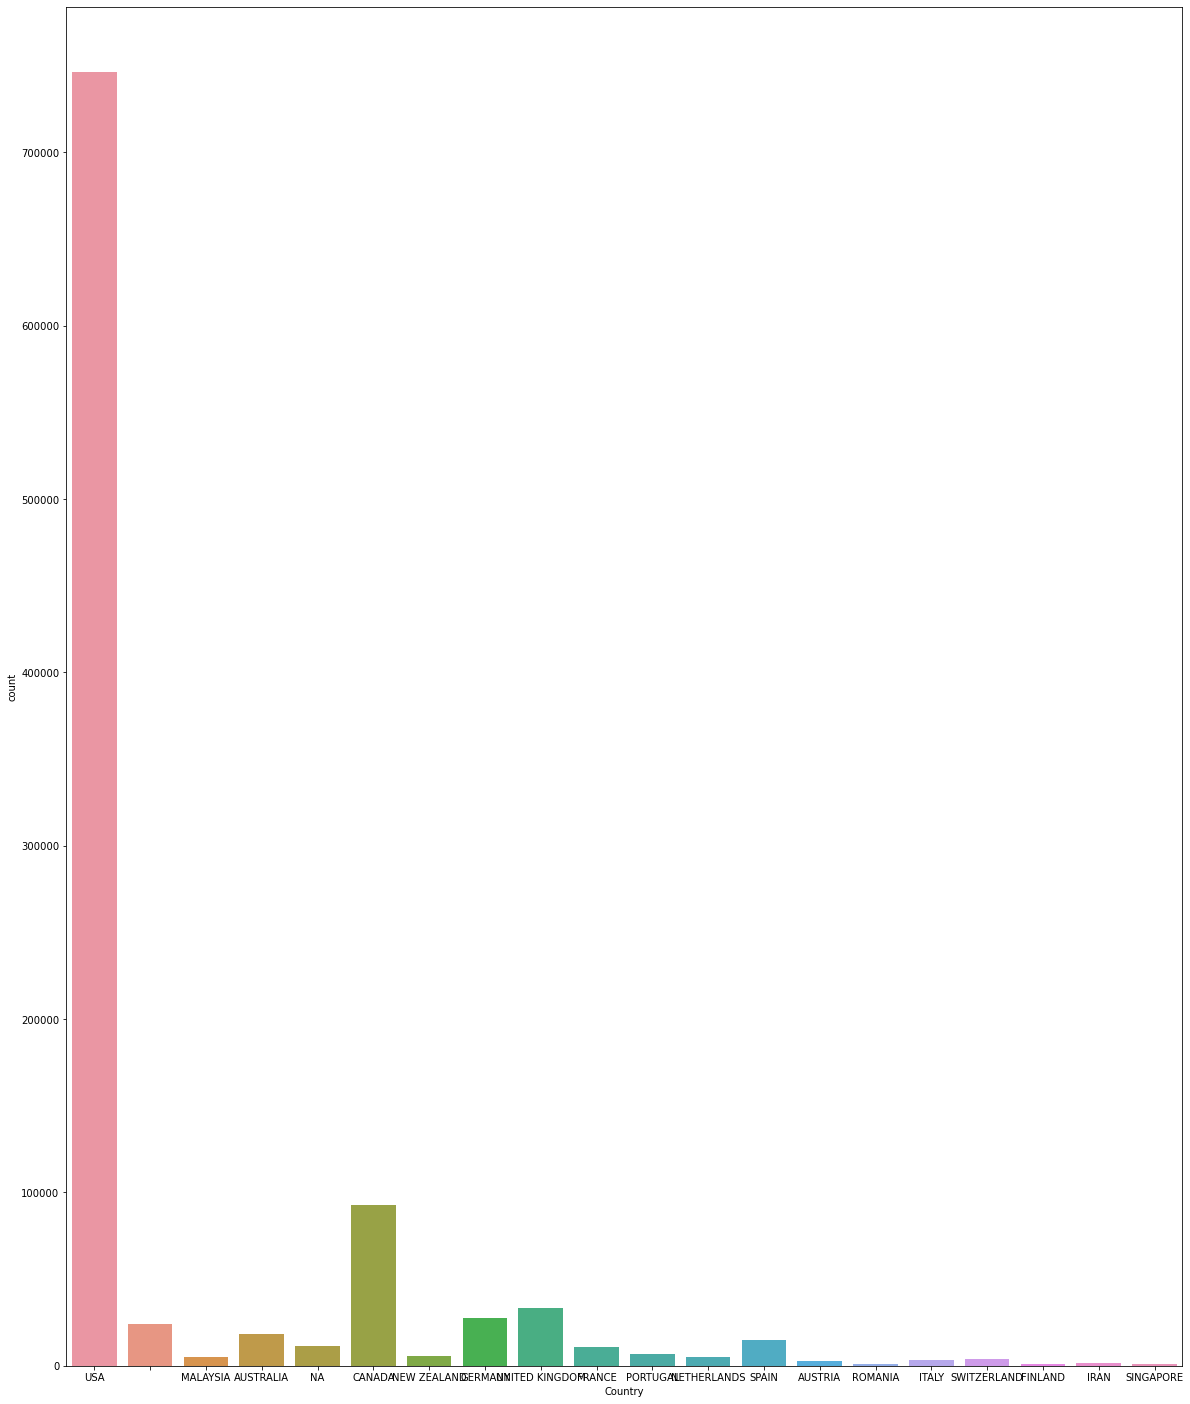

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,25))
sns.countplot(te['Country']);

In [96]:
final[final['Country']=='INDIA']

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
398132,232,0330332775,0,6,Helen Fielding,1997,Picador UK,16.0,MUMBAI,MAHARASHTRA,INDIA
398133,232,0486284735,8,6,Jane Austen,1995,Dover Publications,16.0,MUMBAI,MAHARASHTRA,INDIA
398134,232,0671021745,4,6,Franklin W Dixon,1998,Aladdin,16.0,MUMBAI,MAHARASHTRA,INDIA
398135,232,0671047612,6,6,Franklin W Dixon,2000,Aladdin,16.0,MUMBAI,MAHARASHTRA,INDIA
398136,232,0671504282,6,6,Franklin W Dixon,1995,Simon Pulse,16.0,MUMBAI,MAHARASHTRA,INDIA
...,...,...,...,...,...,...,...,...,...,...,...
1029715,216460,0813531756,7,3,Rachel Dwyer,2002,Rutgers University Press,NOT PROVIDED,NEW DELHI,NA,INDIA
1030148,229227,0131774298,10,1,Peter van der Linden,1994,Prentice Hall PTR,24.0,COCHIN,KERALA,INDIA
1030190,230258,0340728655,5,1,Richard Carlson PhD,1998,Hodder amp Stoughton General Division,30.0,AURANGABAD,MAHARASHTRA,INDIA
1030672,246399,1592280382,0,1,Phoolan Devi,2003,The Lyons Press,19.0,DAVIS,TAMIL NADU,INDIA


In [97]:
final[final['Country']==''].head(2)

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
2719,39002,034545104X,0,1,M J Rose,2002,Ballantine Books,NOT PROVIDED,SAN JOSE,,
11538,128276,034545104X,5,29,M J Rose,2002,Ballantine Books,NOT PROVIDED,LOS ANGELES,,


In [98]:
# final[final["Country"].isin(final['Country'].value_counts().index[final['Country'].value_counts()>1000])]
def plotdata(data, threshold, column_name):
    n_data=data[data[column_name].isin(data[column_name].value_counts().index[data[column_name].value_counts()>threshold])]
    plt.figure(figsize=(35,25))
    return n_data

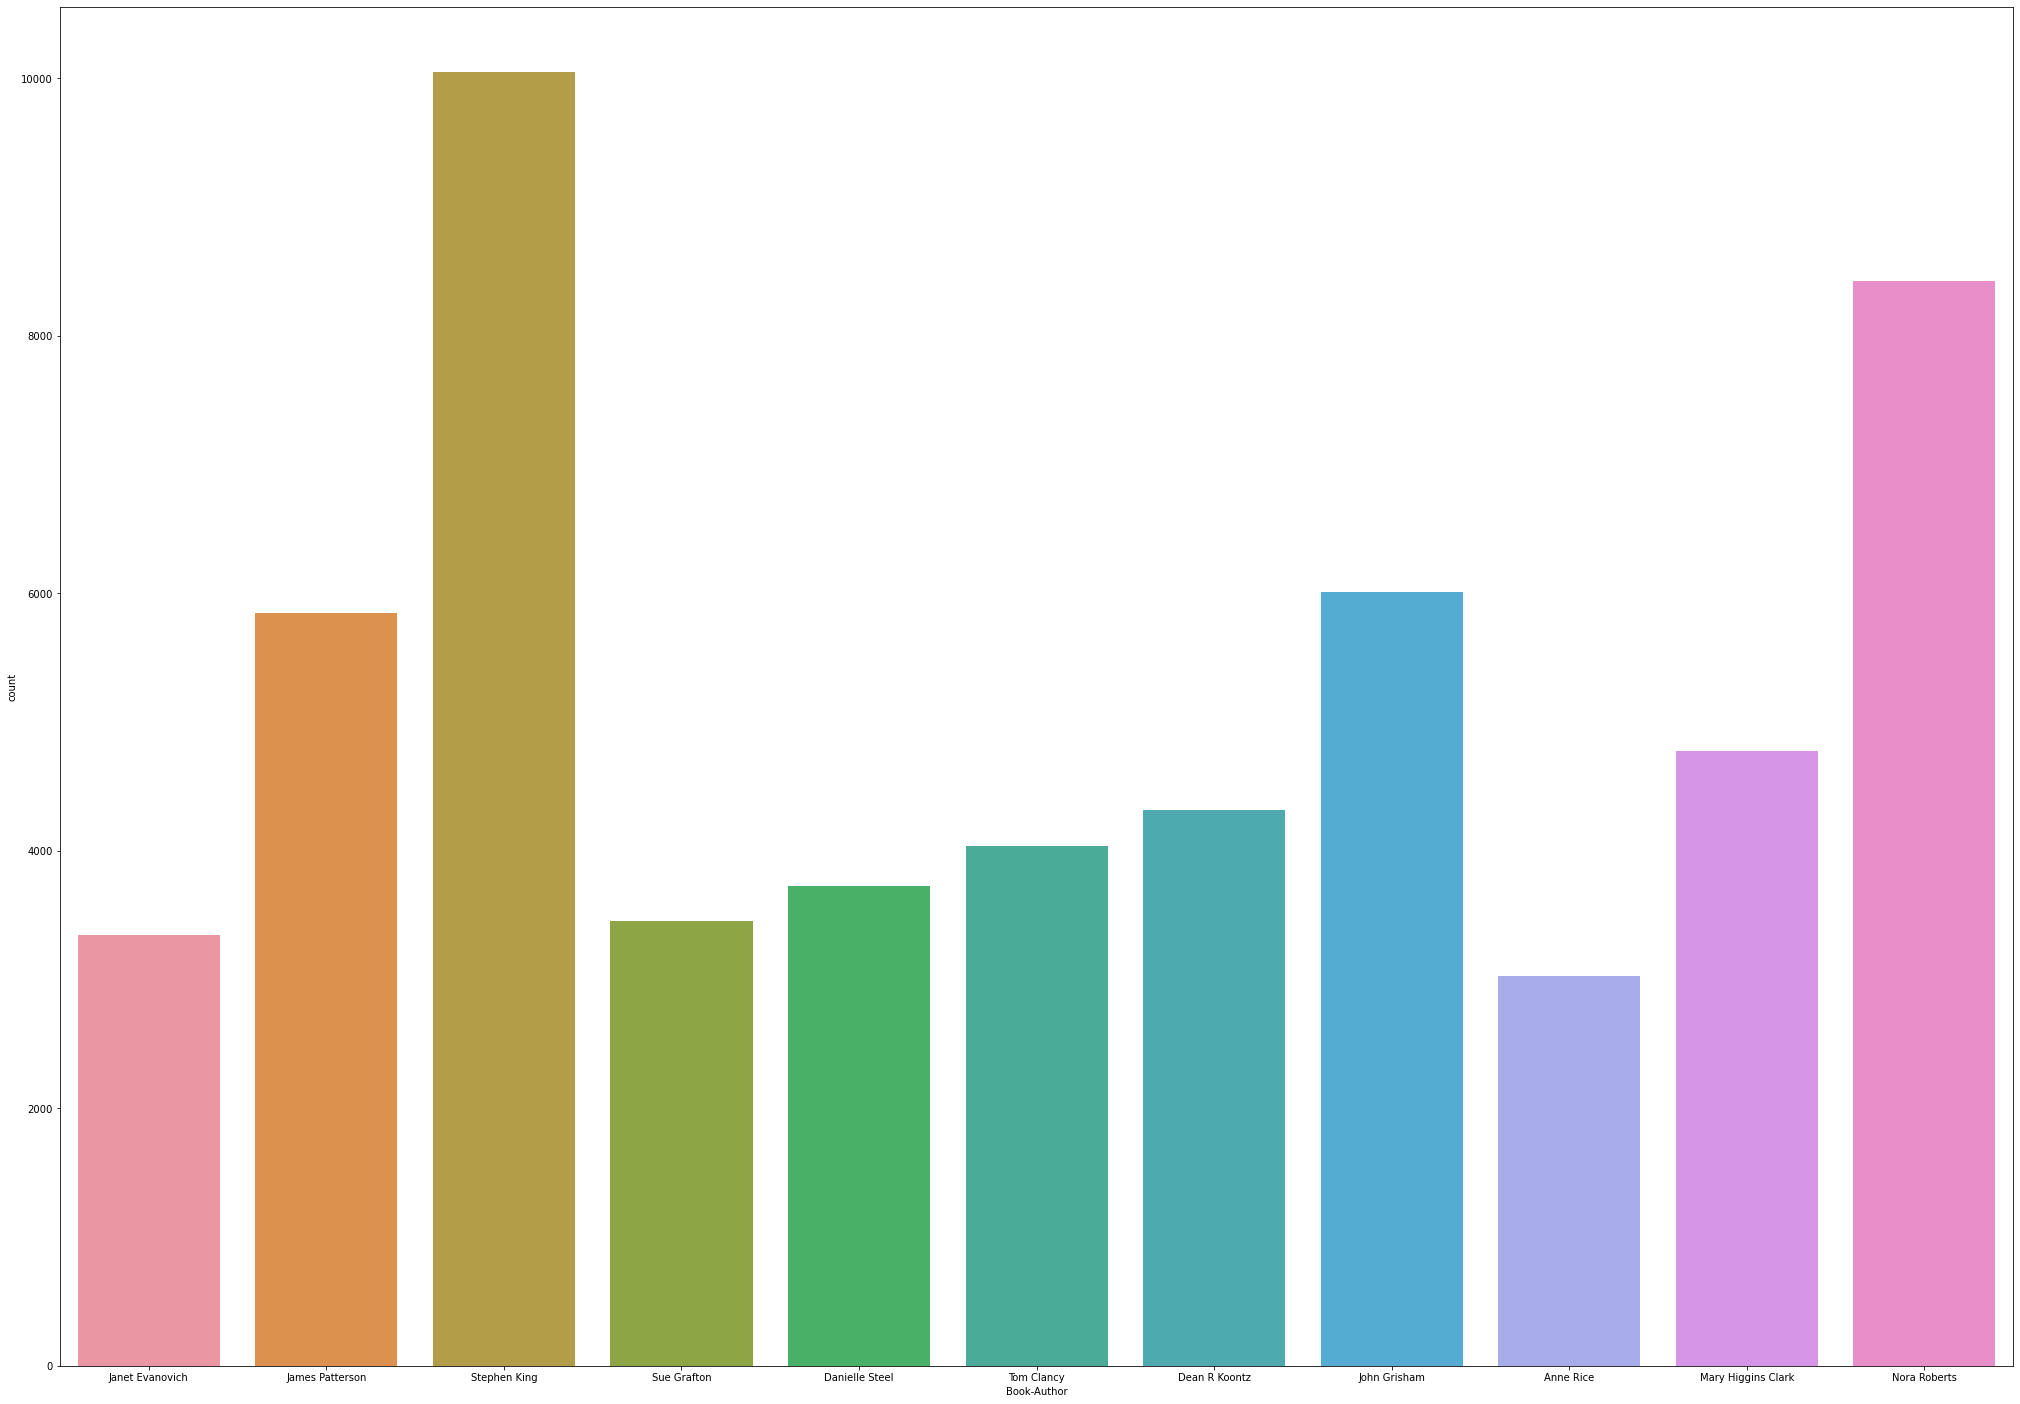

In [99]:
sns.countplot(plotdata(final,3000,'Book-Author')['Book-Author']);

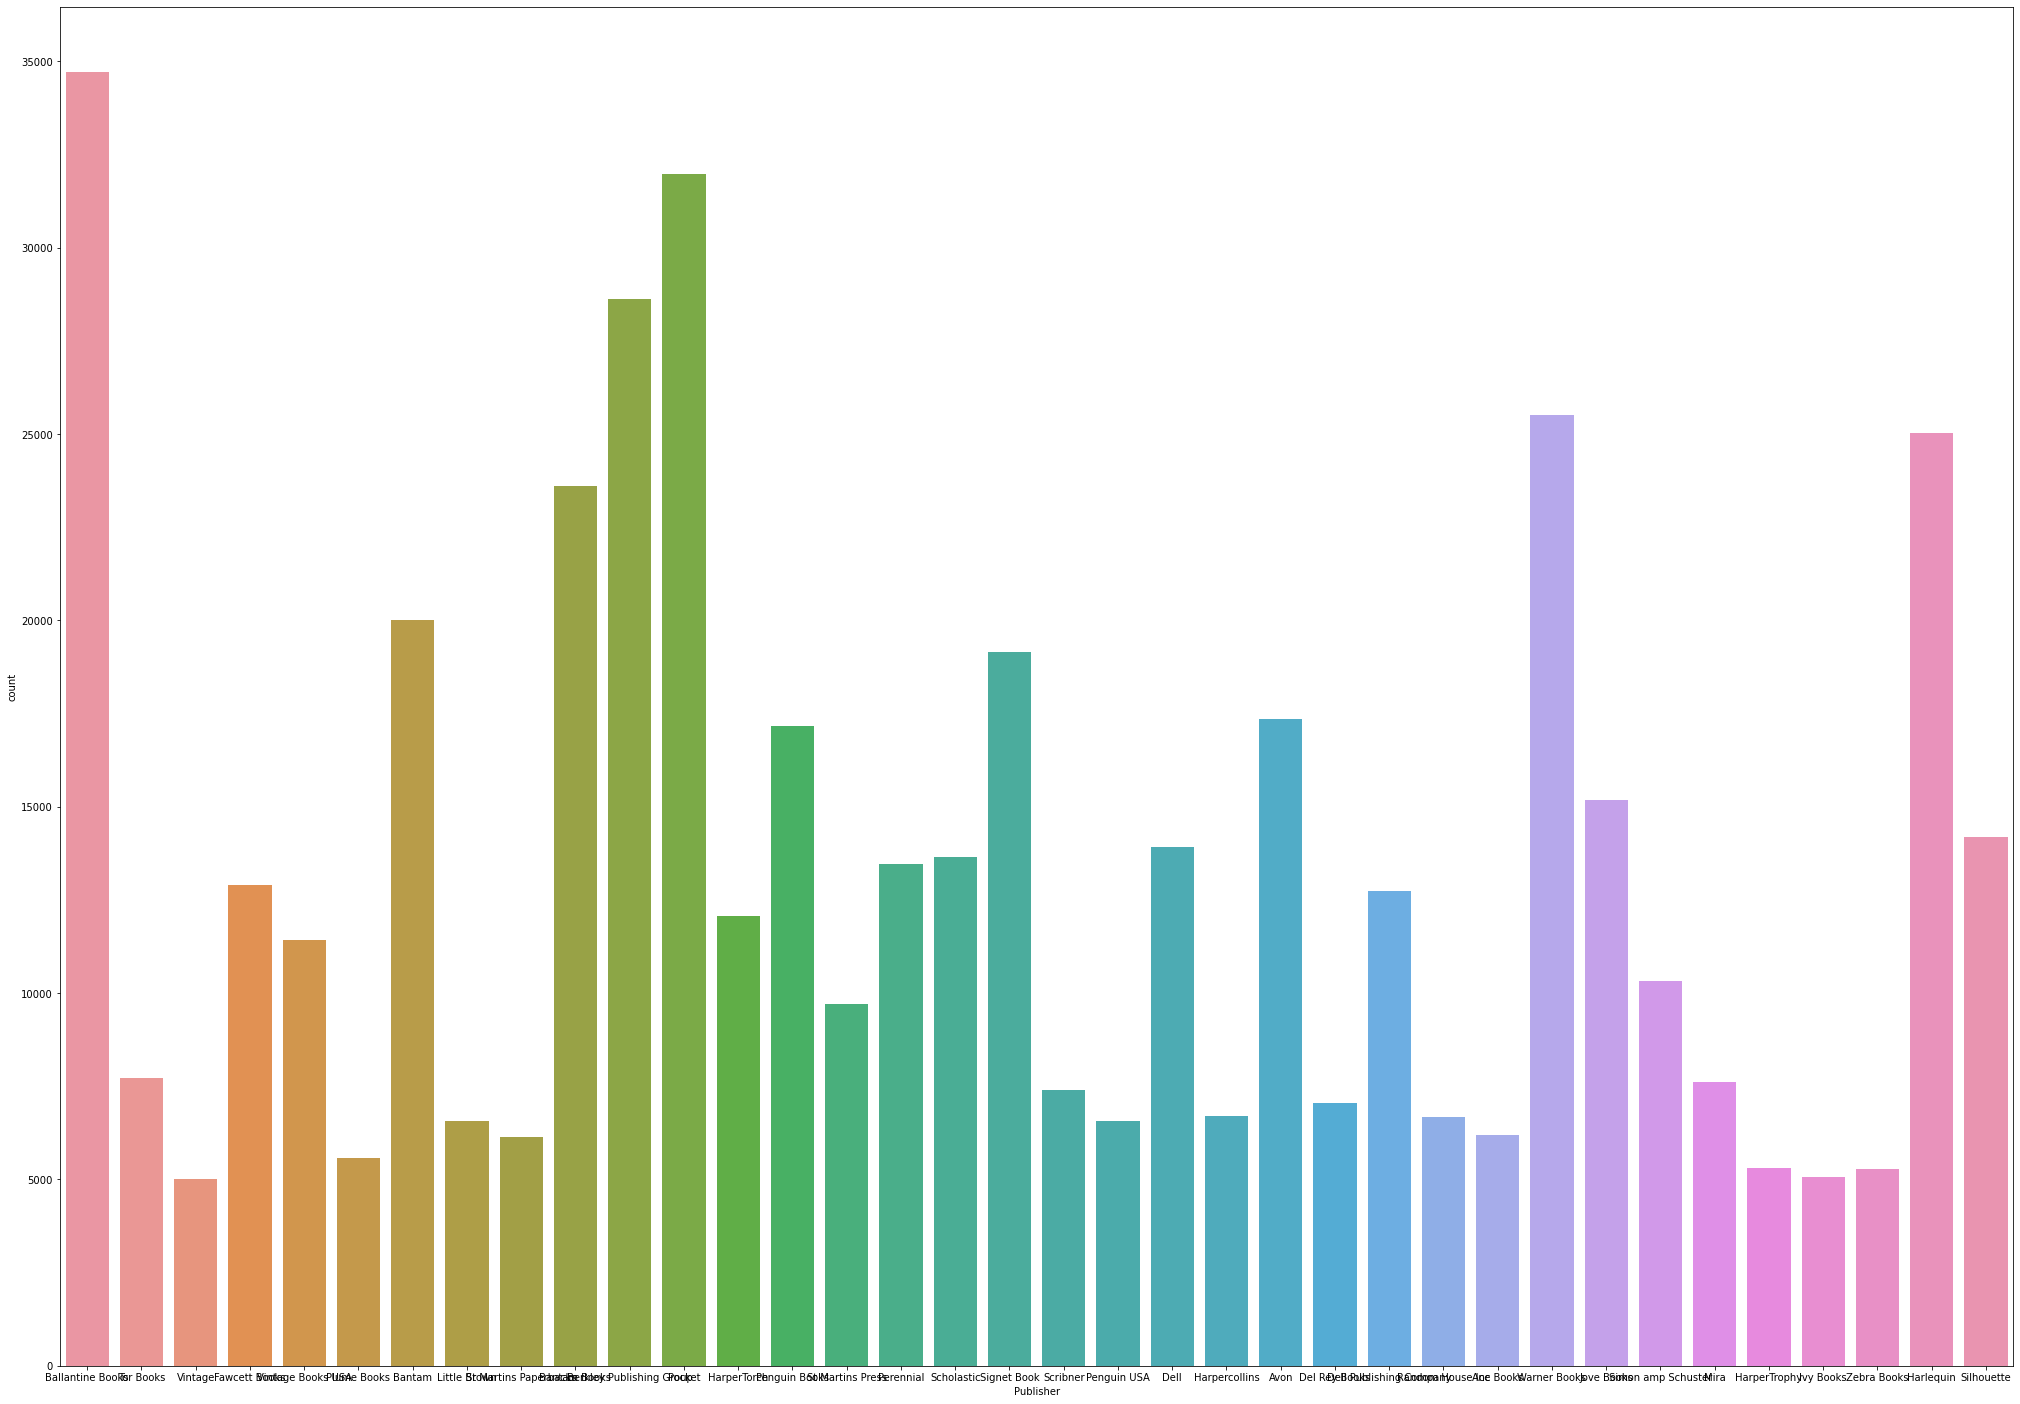

In [100]:
sns.countplot(plotdata(final,5000,'Publisher')['Publisher']);


In [101]:
ratings_new.head(2)

,User-ID,ISBN,Book-Rating,Ratings_counts
0,276725,034545104X,0,1
1,276726,0155061224,5,1


In [102]:
ratings_new[['ISBN','Book-Rating']].groupby("ISBN").mean('Book-Rating')

,Book-Rating
ISBN,
0000913154,8.0
0001010565,0.0
0001046438,9.0
0001046713,0.0
000104687X,6.0
...,...
B000234N76,0.0
B000234NC6,0.0
B00029DGGO,0.0


New book dataset created with average book Rating columns

In [103]:
books_new=books.merge(ratings_new[['ISBN','Book-Rating']].groupby("ISBN").mean('Book-Rating'), on='ISBN')

In [104]:
import plotly

In [105]:
books_new[['ISBN',"Book-Rating"]].sort_values(ascending=False, by='Book-Rating')

,ISBN,Book-Rating
195126,0553281062,10.0
232963,0192142070,10.0
113680,0713651830,10.0
166373,1864500549,10.0
166365,0967720400,10.0
...,...,...
145445,0679404554,0.0
145446,059043683X,0.0
145448,0964047934,0.0
145450,0373169256,0.0


In [106]:
books_new

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,4.272727
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,0.000000
...,...,...,...,...,...,...,...,...,...
269837,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,7.000000
269838,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,4.000000
269839,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,0.000000
269840,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,0.000000


In [107]:
final_new

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,Age,City,State,Country
1,2313,034545104X,5,37,M J Rose,2002,Ballantine Books,23.0,CINCINNATI,OHIO,USA
2,2313,0812533550,9,37,Orson Scott Card,1986,Tor Books,23.0,CINCINNATI,OHIO,USA
3,2313,0679745580,8,37,TRUMAN CAPOTE,1994,Vintage,23.0,CINCINNATI,OHIO,USA
4,2313,0060173289,9,37,Rebecca Wells,1996,HarperCollins,23.0,CINCINNATI,OHIO,USA
5,2313,0385482388,5,37,Chitra Banerjee Divakaruni,1998,Anchor BooksDoubleday,23.0,CINCINNATI,OHIO,USA
...,...,...,...,...,...,...,...,...,...,...,...
1031101,261160,8432231096,7,16,Yukio Mishima,1994,Editorial Seix Barral SA,39.0,TERRASSA,BCN,SPAIN
1031102,261160,8474105706,6,16,Jess Moncada,1992,Edicions de la Magrana,39.0,TERRASSA,BCN,SPAIN
1031103,261160,848547175X,9,16,Ariwara Narihira,1998,Rama Publishing Company,39.0,TERRASSA,BCN,SPAIN
1031142,263093,8804279737,6,19,Fogazzaro,1999,Mondadori IT,19.0,ROMA,LAZIO,ITALY


In [108]:
from pandas_profiling import ProfileReport
profile = ProfileReport(final_new)

In [109]:
profile.to_file("data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [110]:
final_new.drop("Age", axis=1, inplace=True)

In [111]:
final_new.dtypes

User-ID                 int64
ISBN                   object
Book-Rating             int64
Ratings_counts          int64
Book-Author            object
Year-Of-Publication    object
Publisher              object
City                   object
State                  object
Country                object
dtype: object

In [112]:
from sklearn.preprocessing import LabelEncoder
ISBN_encoder=LabelEncoder()
Book_Author_encoder=LabelEncoder()
Publication_year_encoder=LabelEncoder()
Publisher_encoder=LabelEncoder()
City_encoder=LabelEncoder()
State_encoder=LabelEncoder()
Country_encoder=LabelEncoder()

In [113]:
final_encoded=pd.DataFrame({'ISBN':ISBN_encoder.fit_transform(final_new['ISBN']),
              'Book-Author':Book_Author_encoder.fit_transform(final_new['Book-Author']),
              'Year-Of-Publication':Publication_year_encoder.fit_transform(final_new['Year-Of-Publication']),
              'Publisher':Publisher_encoder.fit_transform(final_new['Publisher']),
              'City':City_encoder.fit_transform(final_new['City']),
              'State':State_encoder.fit_transform(final_new['State']),
              'Country':Country_encoder.fit_transform(final_new['Country'])
              })

In [114]:
final_new.reset_index(inplace=True)

In [115]:
try:
    final_new.drop(['level_0','index'],axis=1, inplace=True)
except:
    final_new.drop('index',axis=1, inplace=True)

In [116]:
final_new

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,City,State,Country
0,2313,034545104X,5,37,M J Rose,2002,Ballantine Books,CINCINNATI,OHIO,USA
1,2313,0812533550,9,37,Orson Scott Card,1986,Tor Books,CINCINNATI,OHIO,USA
2,2313,0679745580,8,37,TRUMAN CAPOTE,1994,Vintage,CINCINNATI,OHIO,USA
3,2313,0060173289,9,37,Rebecca Wells,1996,HarperCollins,CINCINNATI,OHIO,USA
4,2313,0385482388,5,37,Chitra Banerjee Divakaruni,1998,Anchor BooksDoubleday,CINCINNATI,OHIO,USA
...,...,...,...,...,...,...,...,...,...,...
877287,261160,8432231096,7,16,Yukio Mishima,1994,Editorial Seix Barral SA,TERRASSA,BCN,SPAIN
877288,261160,8474105706,6,16,Jess Moncada,1992,Edicions de la Magrana,TERRASSA,BCN,SPAIN
877289,261160,848547175X,9,16,Ariwara Narihira,1998,Rama Publishing Company,TERRASSA,BCN,SPAIN
877290,263093,8804279737,6,19,Fogazzaro,1999,Mondadori IT,ROMA,LAZIO,ITALY


In [117]:
final_encoded[['Book-Rating','Ratings_counts','User-ID']]=final_new[['Book-Rating','Ratings_counts','User-ID']]

In [118]:
final_encoded

,ISBN,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Book-Rating,Ratings_counts,User-ID
0,43066,56369,95,1254,757,390,104,5,37,2313
1,171352,67409,79,13299,757,390,104,9,37,2313
2,137862,85520,87,13976,757,390,104,8,37,2313
3,3809,73649,89,5924,757,390,104,9,37,2313
4,66813,14025,91,666,757,390,104,5,37,2313
...,...,...,...,...,...,...,...,...,...,...
877287,246204,92498,87,4315,3939,66,89,7,16,261160
877288,247454,42137,85,4154,3939,66,89,6,16,261160
877289,248276,5500,91,11030,3939,66,89,9,16,261160
877290,248595,27591,92,8837,3357,265,52,6,19,263093


In [119]:

final_encoded[final_encoded['Book-Rating'].isna()]

,ISBN,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Book-Rating,Ratings_counts,User-ID


In [120]:
final_new[final_new['Book-Rating'].isna()]

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,City,State,Country


In [121]:
final_encoded

,ISBN,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Book-Rating,Ratings_counts,User-ID
0,43066,56369,95,1254,757,390,104,5,37,2313
1,171352,67409,79,13299,757,390,104,9,37,2313
2,137862,85520,87,13976,757,390,104,8,37,2313
3,3809,73649,89,5924,757,390,104,9,37,2313
4,66813,14025,91,666,757,390,104,5,37,2313
...,...,...,...,...,...,...,...,...,...,...
877287,246204,92498,87,4315,3939,66,89,7,16,261160
877288,247454,42137,85,4154,3939,66,89,6,16,261160
877289,248276,5500,91,11030,3939,66,89,9,16,261160
877290,248595,27591,92,8837,3357,265,52,6,19,263093


In [122]:
from sklearn.cluster import KMeans
inertia_values = []
for k in range(1, 11):  # You can adjust the range of K as needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_encoded)
    inertia_values.append(kmeans.inertia_)
    print(f"Cluster {k} Completed")

Cluster 1 Completed
Cluster 2 Completed
Cluster 3 Completed
Cluster 4 Completed
Cluster 5 Completed
Cluster 6 Completed
Cluster 7 Completed
Cluster 8 Completed
Cluster 9 Completed
Cluster 10 Completed


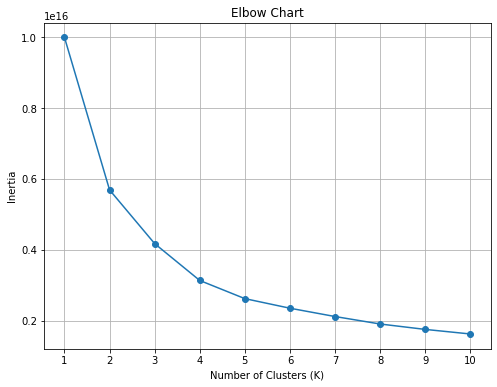

In [123]:
# Plot the elbow chart
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-')
plt.title('Elbow Chart')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [124]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(final_encoded)

KMeans(n_clusters=3, random_state=42)

In [125]:
final_encoded['Cluster']=kmeans.labels_
final_new['Cluster']=kmeans.labels_

In [126]:
final_new

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Cluster
0,2313,034545104X,5,37,M J Rose,2002,Ballantine Books,CINCINNATI,OHIO,USA,2
1,2313,0812533550,9,37,Orson Scott Card,1986,Tor Books,CINCINNATI,OHIO,USA,2
2,2313,0679745580,8,37,TRUMAN CAPOTE,1994,Vintage,CINCINNATI,OHIO,USA,2
3,2313,0060173289,9,37,Rebecca Wells,1996,HarperCollins,CINCINNATI,OHIO,USA,2
4,2313,0385482388,5,37,Chitra Banerjee Divakaruni,1998,Anchor BooksDoubleday,CINCINNATI,OHIO,USA,2
...,...,...,...,...,...,...,...,...,...,...,...
877287,261160,8432231096,7,16,Yukio Mishima,1994,Editorial Seix Barral SA,TERRASSA,BCN,SPAIN,0
877288,261160,8474105706,6,16,Jess Moncada,1992,Edicions de la Magrana,TERRASSA,BCN,SPAIN,0
877289,261160,848547175X,9,16,Ariwara Narihira,1998,Rama Publishing Company,TERRASSA,BCN,SPAIN,0
877290,263093,8804279737,6,19,Fogazzaro,1999,Mondadori IT,ROMA,LAZIO,ITALY,0


In [127]:
final_new['Book-Rating'].value_counts()

0     584109
8      68774
10     57606
7      49210
9      47931
5      34928
6      23135
4       5346
3       3522
2       1669
1       1062
Name: Book-Rating, dtype: int64

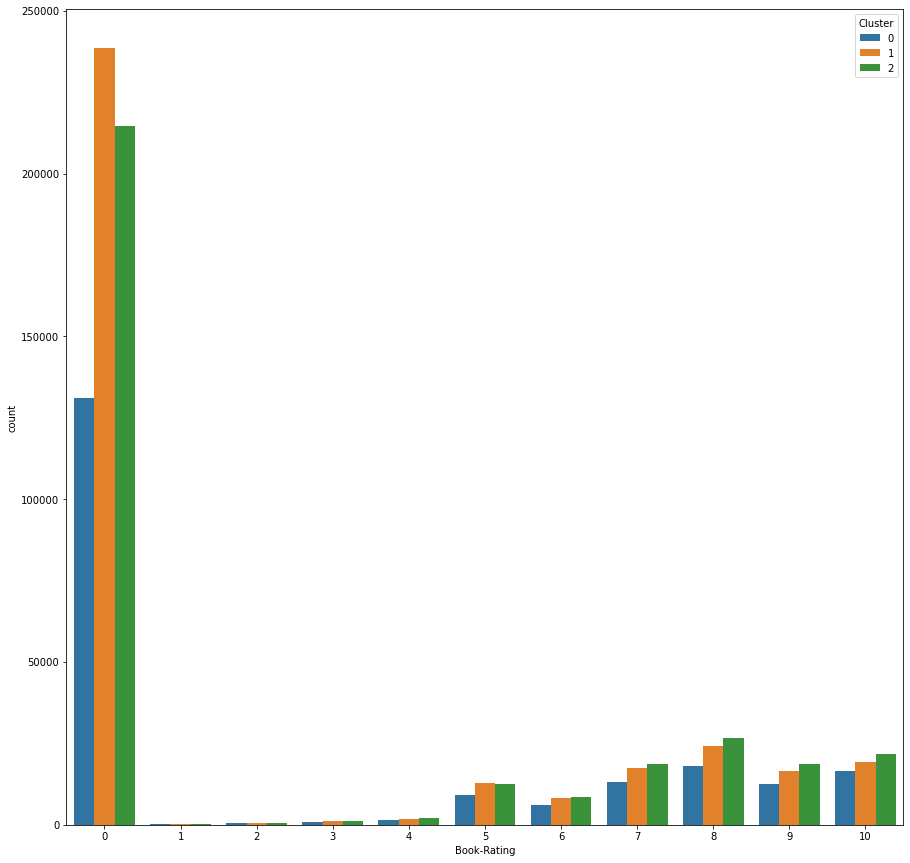

In [128]:
plt.figure(figsize=(15,15))
sns.countplot('Book-Rating',hue='Cluster',data=final_new);


In [129]:
final_new['ISBN'].value_counts()

0971880107    1419
0316666343     861
0385504209     632
0060928336     527
0312195516     487
              ... 
0140542892       1
0140549080       1
0141183160       1
0141311428       1
9578890249       1
Name: ISBN, Length: 250395, dtype: int64

In [130]:
final_new

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Cluster
0,2313,034545104X,5,37,M J Rose,2002,Ballantine Books,CINCINNATI,OHIO,USA,2
1,2313,0812533550,9,37,Orson Scott Card,1986,Tor Books,CINCINNATI,OHIO,USA,2
2,2313,0679745580,8,37,TRUMAN CAPOTE,1994,Vintage,CINCINNATI,OHIO,USA,2
3,2313,0060173289,9,37,Rebecca Wells,1996,HarperCollins,CINCINNATI,OHIO,USA,2
4,2313,0385482388,5,37,Chitra Banerjee Divakaruni,1998,Anchor BooksDoubleday,CINCINNATI,OHIO,USA,2
...,...,...,...,...,...,...,...,...,...,...,...
877287,261160,8432231096,7,16,Yukio Mishima,1994,Editorial Seix Barral SA,TERRASSA,BCN,SPAIN,0
877288,261160,8474105706,6,16,Jess Moncada,1992,Edicions de la Magrana,TERRASSA,BCN,SPAIN,0
877289,261160,848547175X,9,16,Ariwara Narihira,1998,Rama Publishing Company,TERRASSA,BCN,SPAIN,0
877290,263093,8804279737,6,19,Fogazzaro,1999,Mondadori IT,ROMA,LAZIO,ITALY,0


In [131]:
counts=final_new["User-ID"].value_counts()>100
len(counts.index)

13060

In [132]:
final_new[final_new['Ratings_counts']>200]

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Cluster
36,6543,034545104X,0,441,M J Rose,2002,Ballantine Books,STRAFFORD,MISSOURI,USA,2
37,6543,0316666343,0,441,Alice Sebold,2002,Little Brown,STRAFFORD,MISSOURI,USA,2
38,6543,0385504209,0,441,Dan Brown,2003,Doubleday,STRAFFORD,MISSOURI,USA,2
39,6543,0971880107,0,441,Rich Shapero,2004,Too Far,STRAFFORD,MISSOURI,USA,0
40,6543,0312966970,0,441,Janet Evanovich,1999,St Martins Paperbacks,STRAFFORD,MISSOURI,USA,2
...,...,...,...,...,...,...,...,...,...,...,...
867179,254498,8843803859,0,430,Cesare Garboli,2002,M Tropea,CUNEO,PIEMONTE,ITALY,0
867180,254498,885020082X,0,430,Anne Rice,1998,Tea,CUNEO,PIEMONTE,ITALY,0
867181,254498,8876869549,0,430,Altan,1998,F Panini,CUNEO,PIEMONTE,ITALY,0
867182,254498,8877829532,0,430,Lemony Snicket,2002,Distribooks Inc,CUNEO,PIEMONTE,ITALY,0


In [133]:
bo=final_new.groupby("ISBN").count()["Book-Rating"]>10
final_new[final_new["ISBN"].isin(bo[bo].index)]
#bo[bo].index

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Cluster
0,2313,034545104X,5,37,M J Rose,2002,Ballantine Books,CINCINNATI,OHIO,USA,2
1,2313,0812533550,9,37,Orson Scott Card,1986,Tor Books,CINCINNATI,OHIO,USA,2
2,2313,0679745580,8,37,TRUMAN CAPOTE,1994,Vintage,CINCINNATI,OHIO,USA,2
3,2313,0060173289,9,37,Rebecca Wells,1996,HarperCollins,CINCINNATI,OHIO,USA,2
4,2313,0385482388,5,37,Chitra Banerjee Divakaruni,1998,Anchor BooksDoubleday,CINCINNATI,OHIO,USA,2
...,...,...,...,...,...,...,...,...,...,...,...
876437,233726,0380708906,0,10,Stephen R Lawhead,1990,Eos,PERTH,WESTERN AUSTRALIA,AUSTRALIA,1
876454,80509,0316926345,0,10,Evelyn Waugh,1999,Back Bay Books,AMHERST,NEW HAMPSHIRE,USA,2
876540,89332,0451170822,6,10,Peter Straub,2002,Signet Book,SOLLENTUNA,STOCKHOLM,SWEDEN,2
876670,224316,050552421X,7,19,Christine Feehan,2001,Love Spell,CHICHESTER,WEST SUSSEX,UNITED KINGDOM,1


In [134]:
final_new[final_new["Ratings_counts"]<11]

,User-ID,ISBN,Book-Rating,Ratings_counts,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Cluster
3997,94362,034545104X,5,10,M J Rose,2002,Ballantine Books,NORTHRIDGE,CALIFORNIA,USA,2
3998,94362,0060934417,8,10,Ann Patchett,2002,Perennial,NORTHRIDGE,CALIFORNIA,USA,2
3999,94362,0767905385,10,10,Stan Redding,2000,Broadway,NORTHRIDGE,CALIFORNIA,USA,0
4000,94362,0446527785,9,10,Nicholas Sparks,2001,Warner Books,NORTHRIDGE,CALIFORNIA,USA,2
4001,94362,0316969443,5,10,James Patterson,2001,Little Brown,NORTHRIDGE,CALIFORNIA,USA,2
...,...,...,...,...,...,...,...,...,...,...,...
877273,246797,1853917362,0,10,Denise Brock,1998,Murdoch Books UK,WUPPERTAL,NORD RHEIN WESTFALLEN,GERMANY,0
877274,246797,3442760747,10,10,Edward Said,2002,Berliner Taschenbuchverlag,WUPPERTAL,NORD RHEIN WESTFALLEN,GERMANY,0
877282,258825,3576113886,5,10,Claudia Graf,2000,Mosaik,KREFELD,NORDRHEINWESTFALEN,GERMANY,0
877283,258825,3760730906,0,10,Dennis Fairchild,2001,Ars Edition,KREFELD,NORDRHEINWESTFALEN,GERMANY,0


In [135]:
final_encoded

,ISBN,Book-Author,Year-Of-Publication,Publisher,City,State,Country,Book-Rating,Ratings_counts,User-ID,Cluster
0,43066,56369,95,1254,757,390,104,5,37,2313,2
1,171352,67409,79,13299,757,390,104,9,37,2313,2
2,137862,85520,87,13976,757,390,104,8,37,2313,2
3,3809,73649,89,5924,757,390,104,9,37,2313,2
4,66813,14025,91,666,757,390,104,5,37,2313,2
...,...,...,...,...,...,...,...,...,...,...,...
877287,246204,92498,87,4315,3939,66,89,7,16,261160,0
877288,247454,42137,85,4154,3939,66,89,6,16,261160,0
877289,248276,5500,91,11030,3939,66,89,9,16,261160,0
877290,248595,27591,92,8837,3357,265,52,6,19,263093,0


In [136]:
final_encoded.columns[1:].drop('User-ID')

Index(['Book-Author', 'Year-Of-Publication', 'Publisher', 'City', 'State',
       'Country', 'Book-Rating', 'Ratings_counts', 'Cluster'],
      dtype='object')

In [137]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scale=MinMaxScaler()
scale.fit_transform(final_encoded[final_encoded.columns[1:].drop('User-ID')])

array([[6.07306772e-01, 8.40707965e-01, 8.40820705e-02, ...,
        5.00000000e-01, 1.98646263e-03, 1.00000000e+00],
       [7.26249219e-01, 6.99115044e-01, 8.91712485e-01, ...,
        9.00000000e-01, 1.98646263e-03, 1.00000000e+00],
       [9.21373010e-01, 7.69911504e-01, 9.37106075e-01, ...,
        8.00000000e-01, 1.98646263e-03, 1.00000000e+00],
       ...,
       [5.92557478e-02, 8.05309735e-01, 7.39573555e-01, ...,
        9.00000000e-01, 4.41436139e-04, 0.00000000e+00],
       [2.97259152e-01, 8.14159292e-01, 5.92530508e-01, ...,
        6.00000000e-01, 6.62154208e-04, 0.00000000e+00],
       [2.49983839e-01, 0.00000000e+00, 8.09977203e-01, ...,
        0.00000000e+00, 5.88581519e-04, 0.00000000e+00]])

In [178]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

In [206]:
pca_transformation=PCA(n_components=1)
pca_values=pca_transformation.fit_transform(scale.fit_transform(final_encoded[final_encoded.columns[1:].drop('User-ID')]))

In [207]:
flat_list = [item for sublist in pca_values for item in sublist]
flat_list

[-0.39285901739867046,
 -0.18039560293113424,
 -0.21009158350631463,
 -0.22729675863239376,
 -0.39639596883425016,
 -0.3313457820233449,
 -0.24293843981348687,
 -0.2539118637868442,
 -0.5407692658794356,
 -0.21306462347359872,
 -0.21143143033583706,
 -0.4767218541672554,
 -0.32106743223457535,
 -0.300670990196426,
 -0.28220236718546304,
 -0.4815840395846276,
 -0.26043479889134385,
 -0.1417483575723474,
 -0.2581448650115207,
 -0.3994589015728043,
 -0.4936956358520704,
 -0.198525984837695,
 -0.2115093832804563,
 -0.5631300649666703,
 -0.48203198121132157,
 -0.20975734048742845,
 -0.24391894720483584,
 -0.2779389904171955,
 -0.5575981940901513,
 -0.2797626173907158,
 -0.5410922132680644,
 -0.2455969314992763,
 -0.2796156595593909,
 -0.24559651484119535,
 -0.23934729825182208,
 0.5526793256787585,
 -0.5535375538770897,
 -0.5111583257780051,
 -0.5367782623339334,
 0.43689432748091933,
 -0.48162210997513777,
 -0.5533240856765578,
 -0.13108140160682766,
 -0.4710416549573271,
 -0.4774327533901

In [208]:
final_pca=pd.DataFrame(final_new["ISBN"], columns=["ISBN"])

In [209]:
#final_pca=final_new["User-ID"]
final_pca

,ISBN
0,034545104X
1,0812533550
2,0679745580
3,0060173289
4,0385482388
...,...
877287,8432231096
877288,8474105706
877289,848547175X
877290,8804279737


In [210]:
final_pca['User-ID']=final_encoded['User-ID']
final_pca

,ISBN,User-ID
0,034545104X,2313
1,0812533550,2313
2,0679745580,2313
3,0060173289,2313
4,0385482388,2313
...,...,...
877287,8432231096,261160
877288,8474105706,261160
877289,848547175X,261160
877290,8804279737,263093


In [211]:
final_pca['PCA_values']=pd.DataFrame(flat_list)
final_pca.shape

(877292, 3)

In [212]:
final_pca.values

array([['034545104X', 2313, -0.39285901739867046],
       ['0812533550', 2313, -0.18039560293113424],
       ['0679745580', 2313, -0.21009158350631463],
       ...,
       ['848547175X', 261160, 0.7762365081036635],
       ['8804279737', 263093, 0.7106427511912619],
       ['9578890249', 272538, 0.4345778826279535]], dtype=object)

In [213]:
#final_pca=final_pca.values.reshape(np.abs(final_pca.shape))
final_pca=pd.DataFrame(final_pca, columns=['ISBN','User-ID','PCA_values'])

In [214]:
final_pca.values

array([['034545104X', 2313, -0.39285901739867046],
       ['0812533550', 2313, -0.18039560293113424],
       ['0679745580', 2313, -0.21009158350631463],
       ...,
       ['848547175X', 261160, 0.7762365081036635],
       ['8804279737', 263093, 0.7106427511912619],
       ['9578890249', 272538, 0.4345778826279535]], dtype=object)

In [215]:
final_pca.describe()

,User-ID,PCA_values
count,877292.000000,8.772920e+05
mean,140816.373192,-8.481464e-16
std,80521.174331,3.904098e-01
min,8.000000,-5.882321e-01
25%,70628.000000,-3.270980e-01
50%,141710.000000,-4.696085e-02
75%,211919.000000,3.478651e-01
max,278851.000000,9.946917e-01


In [216]:
final_pca['PCA_values']=final_pca['PCA_values'].apply(lambda x: x+2)

In [217]:
final_pca.describe()

,User-ID,PCA_values
count,877292.000000,877292.000000
mean,140816.373192,2.000000
std,80521.174331,0.390410
min,8.000000,1.411768
25%,70628.000000,1.672902
50%,141710.000000,1.953039
75%,211919.000000,2.347865
max,278851.000000,2.994692


In [219]:
pivot_table = final_pca.pivot_table(index='ISBN', columns='User-ID', values='PCA_values')

ValueError: negative dimensions are not allowed

In [ ]:
import numpy as np

arr = np.array([[-1, 2, 3],
                [4, -5, 6]])

positive_dims = np.abs(arr.shape)

print(arr.shape)

(2, 3)
